In [5]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [6]:
load_dotenv()

True

In [7]:
# Set current amoung of crypto assets
My_BTC = 1.2
My_ETH = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [9]:
# Fetch Current BTC Price
BTC_Price = requests.get(btc_url)
BTC_Price
Response_BTC_Price = BTC_Price.content
Response_BTC_Price


b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18731931,\n\t\t\t"total_supply": 18731931,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 36867.0000000000000000,\n\t\t\t\t\t"volume_24h": 42164917340,\n\t\t\t\t\t"market_cap": 691681868464,\n\t\t\t\t\t"percentage_change_1h": 0.1052053893381770,\n\t\t\t\t\t"percentage_change_24h": -1.8285283091854900,\n\t\t\t\t\t"percentage_change_7d": -2.1725822787324900,\n\t\t\t\t\t"percent_change_1h": 0.1052053893381770,\n\t\t\t\t\t"percent_change_24h": -1.8285283091854900,\n\t\t\t\t\t"percent_change_7d": -2.1725822787324900\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 44594.3232,\n\t\t\t\t\t"volume_24h": 51002684014.464,\n\t\t\t\t\t"market_cap": 836658388094.054,\n\t\t\t\t\t"percent_change_1h": 0.1052053893381770,\n\t\t\t\t\t"percent_change_24h": -1.8285283091854900,\n\t\t\t\t\t"p

In [10]:
import json
BTC_Data = json.loads(Response_BTC_Price.decode('utf-8'))
BTC_Data


{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18731931,
   'total_supply': 18731931,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 36867.0,
     'volume_24h': 42164917340,
     'market_cap': 691681868464,
     'percentage_change_1h': 0.105205389338177,
     'percentage_change_24h': -1.82852830918549,
     'percentage_change_7d': -2.17258227873249,
     'percent_change_1h': 0.105205389338177,
     'percent_change_24h': -1.82852830918549,
     'percent_change_7d': -2.17258227873249},
    'CAD': {'price': 44594.3232,
     'volume_24h': 51002684014.464,
     'market_cap': 836658388094.054,
     'percent_change_1h': 0.105205389338177,
     'percent_change_24h': -1.82852830918549,
     'percent_change_7d': -2.17258227873249}},
   'last_updated': 1623369287}},
 'metadata': {'timestamp': 1623369287,
  'num_cryptocurrencies': 1292,
  'error': None}}

In [11]:
Current_BTC_Value = BTC_Data["data"]["1"]["quotes"]["CAD"]["price"]
Current_BTC_Value

44594.3232

In [12]:
# Fetch Current ETH Price
ETH_Price = requests.get(eth_url)
ETH_Price
Response_ETH_Price = ETH_Price.content
Response_ETH_Price

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 116239891,\n\t\t\t"total_supply": 116239891,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 2486.6000000000000000,\n\t\t\t\t\t"volume_24h": 33075957437,\n\t\t\t\t\t"market_cap": 289444120869,\n\t\t\t\t\t"percentage_change_1h": -0.1760237527278190,\n\t\t\t\t\t"percentage_change_24h": -4.9538893295634600,\n\t\t\t\t\t"percentage_change_7d": -8.4851268940305100,\n\t\t\t\t\t"percent_change_1h": -0.1760237527278190,\n\t\t\t\t\t"percent_change_24h": -4.9538893295634600,\n\t\t\t\t\t"percent_change_7d": -8.4851268940305100\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 3007.79136,\n\t\t\t\t\t"volume_24h": 40008678115.7952,\n\t\t\t\t\t"market_cap": 350111608603.142,\n\t\t\t\t\t"percent_change_1h": -0.1760237527278190,\n\t\t\t\t\t"percent_change_24h": -4.9538893295634600,\n\t\t\t

In [13]:
ETH_Data = json.loads(Response_ETH_Price.decode('utf-8'))
ETH_Data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 116239891,
   'total_supply': 116239891,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2486.6,
     'volume_24h': 33075957437,
     'market_cap': 289444120869,
     'percentage_change_1h': -0.176023752727819,
     'percentage_change_24h': -4.95388932956346,
     'percentage_change_7d': -8.48512689403051,
     'percent_change_1h': -0.176023752727819,
     'percent_change_24h': -4.95388932956346,
     'percent_change_7d': -8.48512689403051},
    'CAD': {'price': 3007.79136,
     'volume_24h': 40008678115.7952,
     'market_cap': 350111608603.142,
     'percent_change_1h': -0.176023752727819,
     'percent_change_24h': -4.95388932956346,
     'percent_change_7d': -8.48512689403051}},
   'last_updated': 1623369290}},
 'metadata': {'timestamp': 1623369290,
  'num_cryptocurrencies': 1292,
  'error': None}}

In [14]:
Current_ETH_Value = ETH_Data["data"]["1027"]["quotes"]["CAD"]["price"]
Current_ETH_Value

3007.79136

In [15]:
# Calculate your total BTC and ETH holdings based on your amount (1.2 BTC, 5.3 ETH)
My_BTC_Value = My_BTC * Current_BTC_Value
My_ETH_Value = My_ETH * Current_ETH_Value

print(f"The current value of your {My_BTC} BTC holdings is {My_BTC_Value}")
print(f"The current value of your {My_ETH} ETH holdings is {My_ETH_Value}")
      

The current value of your 1.2 BTC holdings is 53513.18784
The current value of your 5.3 ETH holdings is 15941.294208000001


In [16]:
# Collecting Request through ALPACA
# Create Bonds (AGG) and Stocks (SPY) variable
my_Agg = 200
my_Spy = 50

In [17]:
Alpaca_API_Key =os.getenv("Alpaca_API_Key_ID")
type(Alpaca_API_Key)

str

In [18]:
Alpaca_S_Key = os.getenv("Alpaca_Secret_Key")
type(Alpaca_S_Key)

str

In [19]:
Alpaca = tradeapi.REST(Alpaca_API_Key, Alpaca_S_Key, api_version = "v2")

In [20]:
# Format the current date as ISO format
Today = pd.Timestamp("2021-06-08", tz = "America/New_York").isoformat()
# Create Tickers
Tickers = ["AGG", "SPY"]
# Set Time Frame to 1D
Timeframe = "1D"
# Get stock information for the last 1000 days 
stock_portfolio = Alpaca.get_barset(Tickers, Timeframe, start="", end=Today, limit=1000).df
stock_portfolio.index = stock_portfolio.index.date
stock_portfolio

AGG                                         SPY          \
              open      high     low    close   volume    open    high   
2017-06-19  109.87  109.9000  109.74  109.790  1375531  243.59  244.73   
2017-06-20  109.85  110.0300  109.80  109.975  2010628  244.25  244.26   
2017-06-21  109.88  110.0400  109.88  109.980  1085301  243.43  243.59   
2017-06-22  110.06  110.0947  109.95  110.050  1295361  242.97  243.53   
2017-06-23  110.01  110.1085  109.98  110.070  1101304  242.91  243.51   
...            ...       ...     ...      ...      ...     ...     ...   
2021-06-02  114.45  114.5100  114.30  114.485  5649317  420.37  421.23   
2021-06-03  114.31  114.4600  114.21  114.210  3270096  417.87  419.99   
2021-06-04  114.39  114.6700  114.22  114.665  4334878  420.75  422.92   
2021-06-07  113.97  114.6400  113.97  114.595  3639918  422.59  422.78   
2021-06-08  114.84  114.8700  114.78  114.820  3951702  423.11  423.21   

                                        
                 low   close    volume  
2017-06-19  243.4800  244.64  42503652  
2017-06-20  242.9900  243.04  39203167  
2017-06-21  242.4100  242.95  42746920  
2017-06-22  242.6400  242.83  32991335  
2017-06-23  242.4700  243.16  45792641  
...              ...     ...       ...  
2021-06-02  419.2900  420.38  41250387  
2021-06-03  416.2800  418.86  51582905  
2021-06-04  418.8422  422.57  45129316  
2021-06-07  421.1900  422.23  41442963  
2021-06-08  420.3200  422.27  40131441  

[1000 rows x 10 columns]

In [21]:
# Get Closing prices for today
stock_portfolio_today = Alpaca.get_barset(Tickers, Timeframe, start=Today, end=Today).df
AGG_Close_Price = float(stock_portfolio_today["AGG"]["close"])
SPY_Close_Price = float(stock_portfolio_today["SPY"]["close"])

In [22]:
# Your total value
Total_AGG_Value = AGG_Close_Price * my_Agg
Total_SPY_Value = SPY_Close_Price * my_Spy

print(f"The current value of your {my_Agg} AGG holdings is {Total_AGG_Value}")
print(f"The current value of your {my_Spy} SPY holdings is {Total_SPY_Value}")

The current value of your 200 AGG holdings is 22964.0
The current value of your 50 SPY holdings is 21113.5


In [23]:
# Savings Health Analysis
Household_Income = 12000
Total_Crypto = My_BTC_Value + My_ETH_Value
Total_Stock = Total_AGG_Value + Total_SPY_Value
Amount = {'amount':[Total_Crypto, Total_Stock]}

In [24]:
# Create Savings DataFrame
My_Savings = pd.DataFrame(Amount, index = ['Crypto', 'Stock'])
My_Savings

,amount
Crypto,69454.482048
Stock,44077.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

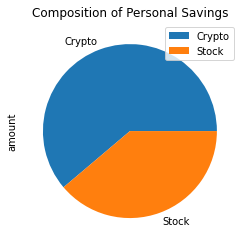

In [25]:
# Plot Savings Pie Chart
My_Savings.plot.pie(title="Composition of Personal Savings", y= "amount")

In [26]:
# Set ideal emergency fund
Emergency_Fund = Household_Income * 3

#Calculate total amount of savings
Total_Savings = Total_Crypto + Total_Stock
Total_Savings

113531.982048

In [27]:
# Validate Saving Health

if Emergency_Fund <= Total_Savings:
    print("Congratulations! You have enough money in your emergency fund.")
elif Emergency_Fund > Total_Savings:
    print("Unfortunately, you do not have enough money in your emergency fund")

Congratulations! You have enough money in your emergency fund.


In [28]:
# PART 2 - RETIREMENT PLANNING
# Set start and end dates of five years back from today
Start_Date = pd.Timestamp('2016-06-08', tz='America/New_York').isoformat()
End_Date = pd.Timestamp('2021-06-08', tz='America/New_York').isoformat()

In [29]:
# Get 5 years' worth of historical data for SPY and AGG
# Use limit=1000

Tickers = ["SPY", "AGG"]
Stock_Data = Alpaca.get_barset(Tickers, Timeframe, start=Start_Date, end=End_Date, limit=1000).df
Stock_Data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-06-16 00:00:00-04:00  109.86  109.9700  109.85  109.945  1709677.0   
2017-06-19 00:00:00-04:00  109.87  109.9000  109.74  109.790  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.0300  109.80  109.975  2010628.0   
2017-06-21 00:00:00-04:00  109.88  110.0400  109.88  109.980  1085301.0   
2017-06-22 00:00:00-04:00  110.06  110.0947  109.95  110.050  1295361.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-06-16 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-06-19 00:00:00-04:00  243.59  244.73  243.48  244.64  42503652.0  
2017-06-20 00:00:00-04:00  244.25  244.26  242.99  243.04  39203167.0  
2017-06-21 00:00:00-04:00  243.43  243.59  242.41  242.95  42746920.0  
2017-06-22 00:00:00-04:00  242.97  243.53  242.64  242.83  32991335.0

In [30]:
# Drop the time and just show date
Stock_Data.index = Stock_Data.index.date
Stock_Data.head()

AGG                                           SPY          \
              open      high     low    close     volume    open    high   
2017-06-16  109.86  109.9700  109.85  109.945  1709677.0     NaN     NaN   
2017-06-19  109.87  109.9000  109.74  109.790  1375531.0  243.59  244.73   
2017-06-20  109.85  110.0300  109.80  109.975  2010628.0  244.25  244.26   
2017-06-21  109.88  110.0400  109.88  109.980  1085301.0  243.43  243.59   
2017-06-22  110.06  110.0947  109.95  110.050  1295361.0  242.97  243.53   

                                        
               low   close      volume  
2017-06-16     NaN     NaN         NaN  
2017-06-19  243.48  244.64  42503652.0  
2017-06-20  242.99  243.04  39203167.0  
2017-06-21  242.41  242.95  42746920.0  
2017-06-22  242.64  242.83  32991335.0

In [31]:
weights = [0.4,0.6]
num_simulation = 500
Years = 30
Number_Trading_Days_Per_Year = 252
num_trading_days = Number_Trading_Days_Per_Year*Years
num_trading_days

7560

In [32]:
# Monte Carlo Simulation to forecast 30 years cumulative returns

Monte_Carlo_Sim30 = MCSimulation(portfolio_data = Stock_Data, weights=[0.4,0.6], num_trading_days = 7560, num_simulation = 500)

In [33]:
Monte_Carlo_Sim30.portfolio_data.head()

AGG                                                        SPY  \
              open      high     low    close     volume daily_return    open   
2017-06-16  109.86  109.9700  109.85  109.945  1709677.0          NaN     NaN   
2017-06-19  109.87  109.9000  109.74  109.790  1375531.0    -0.001410  243.59   
2017-06-20  109.85  110.0300  109.80  109.975  2010628.0     0.001685  244.25   
2017-06-21  109.88  110.0400  109.88  109.980  1085301.0     0.000045  243.43   
2017-06-22  110.06  110.0947  109.95  110.050  1295361.0     0.000636  242.97   

                                                             
              high     low   close      volume daily_return  
2017-06-16     NaN     NaN     NaN         NaN          NaN  
2017-06-19  244.73  243.48  244.64  42503652.0          NaN  
2017-06-20  244.26  242.99  243.04  39203167.0    -0.006540  
2017-06-21  243.59  242.41  242.95  42746920.0    -0.000370  
2017-06-22  243.53  242.64  242.83  32991335.0    -0.000494

In [34]:
Monte_Carlo_Sim30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003090,1.006016,1.002536,1.005078,0.990593,0.990618,0.984623,0.994219,0.997918,0.991780,...,1.003127,0.986726,1.007972,0.991823,1.020561,1.006514,0.988671,1.006754,1.000674,1.005977
2,1.008717,1.017692,1.006789,1.013929,0.998008,0.983711,0.979551,0.994306,0.988599,0.990551,...,1.005556,0.987593,1.005557,0.985703,1.018865,1.007521,0.993892,1.014056,1.007677,1.016005
3,0.999792,1.006591,1.001117,1.012656,0.995518,0.985222,0.981288,0.988563,0.996493,0.990450,...,1.013291,0.981021,1.008360,0.979489,1.027563,1.003015,0.996643,1.016143,1.004851,0.999503
4,1.000996,1.003043,0.995769,1.002198,0.990460,1.000936,0.972832,0.991845,0.990908,0.975852,...,1.013490,0.993425,1.016768,0.984446,1.033941,1.002262,1.005386,1.021398,1.001236,0.983974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,27.850020,5.820599,24.902273,5.542812,12.897191,6.929982,15.034362,23.482980,43.664899,6.771582,...,17.650971,15.770062,20.649204,9.906865,33.428396,30.519910,6.401224,34.242518,31.373684,12.501386
7557,27.763055,5.799877,25.142158,5.537339,12.932896,6.946076,15.155816,23.570670,43.348067,6.705645,...,17.553993,15.576621,20.739108,9.963667,33.505105,30.425711,6.422287,34.368250,31.311577,12.343399
7558,27.697787,5.758681,25.033674,5.535474,13.116753,6.916584,15.229668,23.678675,42.808370,6.714429,...,17.903854,15.761347,20.732035,10.001484,33.484227,30.337399,6.461121,34.229893,31.384388,12.310743
7559,27.523859,5.750127,25.136982,5.549313,13.170770,7.019715,15.106328,23.764543,43.291564,6.696366,...,17.961833,15.606371,20.515993,10.072818,33.534642,30.175767,6.447069,34.475380,31.413549,12.277071


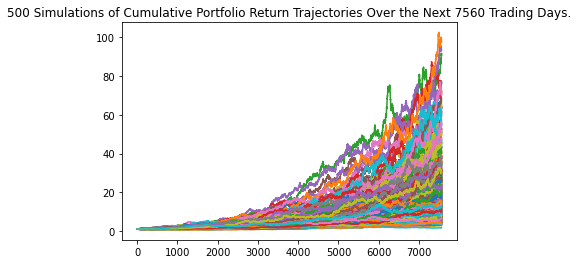

In [35]:
#plot simulation outcomes
line_plot = Monte_Carlo_Sim30.plot_simulation()

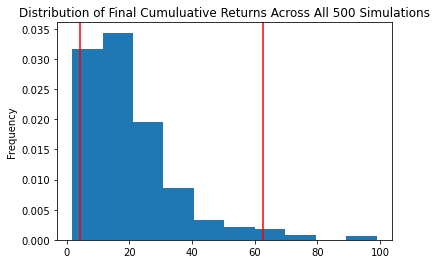

In [36]:
# Plot probability distribution and confidence intervals
dist_plot = Monte_Carlo_Sim30.plot_distribution()

In [37]:
#Fetch summary statistics from the Monte Carlo simulation results
Sum_Stat = Monte_Carlo_Sim30.summarize_cumulative_return()
print(Sum_Stat)

count           500.000000
mean             20.235346
std              14.733235
min               1.710329
25%              10.322341
50%              16.159341
75%              25.736102
max              98.907247
95% CI Lower      4.135634
95% CI Upper     62.519830
Name: 7560, dtype: float64


In [38]:
# Set an initial investment of 20,000
Initial_Investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

Lower_Confidence_Interval = round(Sum_Stat[8]*20000,2)
Upper_Confidence_Interval = round(Sum_Stat[9]*20000,2)

In [39]:
# Print Results
print(f"There is a 95% chance that an initial investment of ${Initial_Investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${Lower_Confidence_Interval} and ${Upper_Confidence_Interval}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $82712.67 and $1250396.59


In [40]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based 
#on a 50% increase in the initial investment.

In [41]:
initial_investment = 20000*1.5
initial_investment

30000.0

In [42]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
Lower_Confidence_Interval30 = round(Sum_Stat[8]*30000,2)
Upper_Confidence_Interval30 = round(Sum_Stat[9]*30000,2)

# Print Results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${Lower_Confidence_Interval30} and ${Upper_Confidence_Interval30}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $124069.01 and $1875594.89


In [43]:
Results = open("results.txt", 'w')

In [45]:
Results.write(f"Portfolio Analysis\n")
Results.write(f"--------------------\n")
Results.write(f"The current value of your {My_BTC} BTC holdings is {My_BTC_Value}\n")
Results.write(f"The current value of your {My_ETH} ETH holdings is {My_ETH_Value}\n")
Results.write(f"The current value of your {my_Agg} AGG holdings is {Total_AGG_Value}\n")
Results.write(f"The current value of your {my_Spy} SPY holdings is {Total_SPY_Value}\n")
Results.write(f"The total value of your holdings is {Total_Savings}\n")
Results.write(f"There is a 95% chance that an initial investment of ${Initial_Investment} in the portfolio over the next 30 years will end within in the range of ${Lower_Confidence_Interval} and ${Upper_Confidence_Interval}")


156